In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.stats import linregress
import scipy.stats as stats
import seaborn as sns
sns.set()

In [14]:
#Read merged_state_data.csv and convert to dataframe
data_file = pd.read_csv("Resources/merged_state_data.csv")
grad_data_file = pd.read_csv("Resources/fin_grad_enroll.csv")

merged_state_df = data_file
grad_data = grad_data_file

In [15]:
# Drop nulls. We only can only calculate where we have data for all fields
merged_state_df.dropna(how = 'any', inplace = True)

# Create new columns for average revenue/spend per student
merged_state_df["Average Revenue per Student"] = (merged_state_df["Total Revenues"].astype(float)/merged_state_df["Enrollment"].astype(float))*1000
merged_state_df["Average Spend per Student"] = (merged_state_df["Total Expenditures"].astype(float)/merged_state_df["Enrollment"].astype(float))*1000

merged_state_df


,State,Year,Total Revenues,Total Expenditures,Enrollment,Average Math Score (4th Grade),Average Math Score (8th Grade),Average Reading Score (4th Grade),Average Reading Score (8th Grade),Average Revenue per Student,Average Spend per Student
12,Alabama,2003,5196054.0,5298932.0,727900.0,223.344643,261.939022,207.083848,253.172594,7138.417365,7279.752713
14,Alabama,2005,5889966.0,5904664.0,729342.0,225.071236,262.211100,207.752033,251.978391,8075.725791,8095.878203
16,Alabama,2007,7069040.0,7196459.0,743273.0,228.520018,266.000110,216.388954,251.936881,9510.691227,9682.120836
18,Alabama,2009,7186390.0,7815467.0,745668.0,227.962650,268.524120,216.273356,254.895247,9637.519647,10481.161858
20,Alabama,2011,7376725.0,7411768.0,746933.0,231.286019,269.096516,220.273413,258.421090,9876.019670,9922.935524
...,...,...,...,...,...,...,...,...,...,...,...
1354,Wyoming,2007,1477891.0,1390344.0,85034.0,243.866915,286.987771,225.289483,266.225544,17380.000941,16350.448056
1356,Wyoming,2009,1675761.0,1658156.0,86971.0,242.009196,286.104034,222.652196,268.159428,19268.043371,19065.619574
1358,Wyoming,2011,1650621.0,1656850.0,88165.0,243.874435,287.767926,224.062278,269.568730,18721.953156,18792.604775
1360,Wyoming,2013,1695967.0,1675477.0,91533.0,246.522401,288.119137,225.848975,270.966172,18528.476069,18304.622377


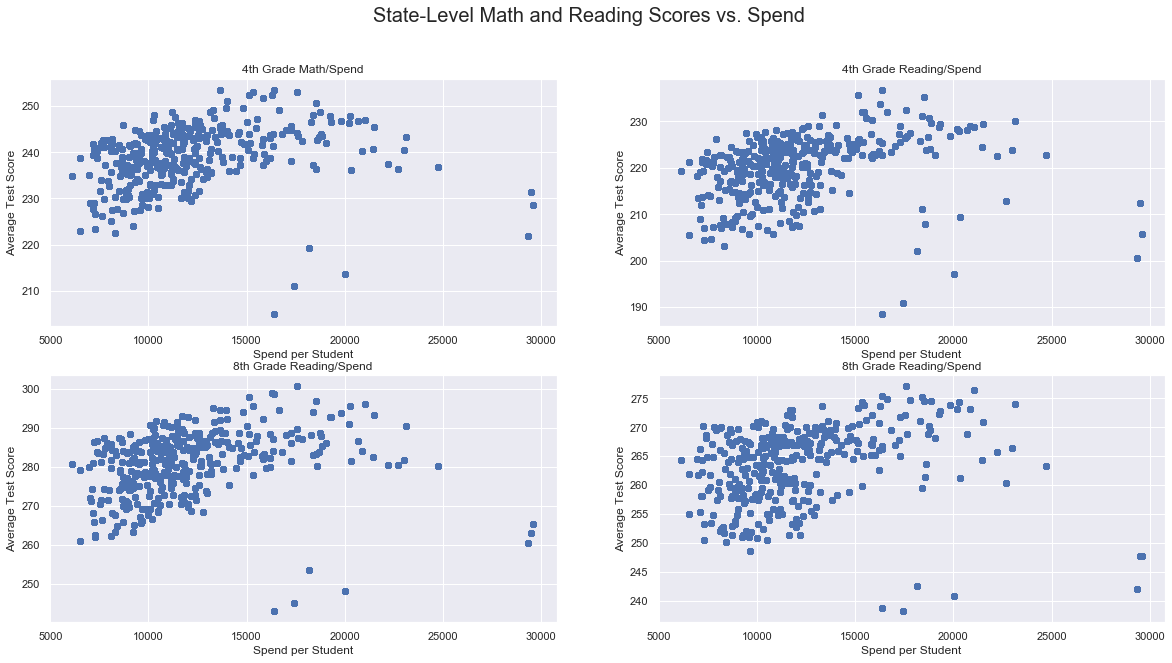

In [16]:
###################################
# Create scatter plots to compare average spend to test scores
###################################
spend_per_student = []
avg_math_score_4 = []
avg_reading_score_4 = []
avg_math_score_8 = []
avg_reading_score_8 = []

###################################
# Grade 4 Metrics
###################################

# Run loops to pull out x and y vals
for x in merged_state_df["Average Spend per Student"]:
    spend_per_student.append(merged_state_df["Average Spend per Student"])
    
for y in merged_state_df["Average Math Score (4th Grade)"]:
    avg_math_score_4.append(merged_state_df["Average Math Score (4th Grade)"])

for z in merged_state_df["Average Reading Score (4th Grade)"]:
    avg_reading_score_4.append(merged_state_df["Average Reading Score (4th Grade)"])
    
###################################
# Grade 8 Metrics
###################################
    
for a in merged_state_df["Average Math Score (8th Grade)"]:
    avg_math_score_8.append(merged_state_df["Average Math Score (8th Grade)"])

for b in merged_state_df["Average Reading Score (8th Grade)"]:
    avg_reading_score_8.append(merged_state_df["Average Reading Score (8th Grade)"])


# Create Scatter plots
fig, axs = plt.subplots(2, 2, figsize = (20,10))
axs[0, 0].scatter(spend_per_student, avg_math_score_4)
axs[0, 0].set_title('4th Grade Math/Spend')

axs[0, 1].scatter(spend_per_student, avg_reading_score_4)
axs[0, 1].set_title('4th Grade Reading/Spend')

axs[1, 0].scatter(spend_per_student, avg_math_score_8)
axs[1, 0].set_title('8th Grade Reading/Spend')

axs[1, 1].scatter(spend_per_student, avg_reading_score_8)
axs[1, 1].set_title('8th Grade Reading/Spend')

# plt.xlim(0, 35)
# plt.ylim(180, 260)
fig.suptitle('State-Level Math and Reading Scores vs. Spend', fontsize = 20)


for ax in axs.flat:
    ax.set(xlabel='Spend per Student', ylabel='Average Test Score')

plt.savefig("BP_State_Scores_vs_Spend.png")
plt.show()

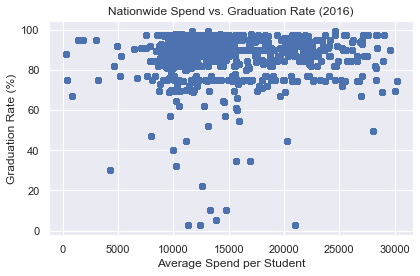

In [17]:
##########################################
# Create scatter for Spend/Student and grad rates
##########################################

# Create arrays for x and y vals
totalExp = []
gradRates = []

# Drop records that don't have enrollment data and calculate spend/student
new_grad_data = grad_data.dropna(subset=["Enrollment"])
new_grad_data_df = new_grad_data.loc[(new_grad_data["Enrollment"] != 0.0)].copy() 


new_grad_data_df["Spend_Per_Student"] = new_grad_data_df["Total Expenditures"]/new_grad_data_df["Enrollment"]

##########################################
# DF When Grouped by State
##########################################
# Group grad file by State and Create DataFrame
# grad_data_by_state = new_grad_data_df.groupby(["State"])



# avg_grad_rate_df = pd.DataFrame({"Graduation Rate": grad_data_by_state["Graduation Rate"].mean()
#                                 ,"Spend per Student": grad_data_by_state["Spend_Per_Student"].mean()})
# avg_grad_rate_df.reset_index(level=['State'], inplace=True)

# # Build Graph
# for x in avg_grad_rate_df["State"]:
#     totalExp.append(avg_grad_rate_df["Spend per Student"])

# for y in avg_grad_rate_df["State"]:
#     gradRates.append(avg_grad_rate_df["Graduation Rate"])

# x_values = totalExp
# y_values = gradRates


# plt.scatter(x_values, y_values)
# plt.figure(figsize = (20,20))
# plt.show()


##########################################
# DF When Grouped by District
##########################################
# Group grad file by State and Create DataFrame
grad_data_by_district = new_grad_data_df.groupby(["School District"])

avg_grad_rate_df = pd.DataFrame({"Graduation Rate": grad_data_by_district["Graduation Rate"].mean()
                                ,"Spend per Student": grad_data_by_district["Spend_Per_Student"].mean()})
avg_grad_rate_df.reset_index(level=['School District'], inplace=True)

############################################
# Run statistics to get upper and lower bounds
############################################
# Calculate IQR
quartiles = avg_grad_rate_df["Spend per Student"].quantile([.25, .5, .75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

# Calculate upper and lower bounds
upper_bound = upperq + (1.5 * iqr) #
lower_bound = lowerq - (1.5 * iqr) #

# Create Adjusted DF without outliers
adj_avg_grad_rate_df = avg_grad_rate_df.loc[(avg_grad_rate_df["Spend per Student"] < upper_bound)
                                           & (avg_grad_rate_df["Spend per Student"] > lower_bound)]


# Build Graph
for x in adj_avg_grad_rate_df["School District"]:
    totalExp.append(adj_avg_grad_rate_df["Spend per Student"])

for y in adj_avg_grad_rate_df["School District"]:
    gradRates.append(adj_avg_grad_rate_df["Graduation Rate"])

x_values = totalExp
y_values = gradRates


plt.scatter(x_values, y_values)
plt.title("Nationwide Spend vs. Graduation Rate (2016)")
plt.xlabel("Average Spend per Student")
plt.ylabel("Graduation Rate (%)")
plt.tight_layout()
plt.savefig("BP_Spend_vs_GradRate.png")
plt.show()

In [6]:
# merged_state_df.to_csv("Resources/merged_state_df.csv", index = True, header = True)

In [18]:
# Combine Math/Reading Scores for Regression by Grade
merged_state_df["Average Math/Reading Score (4th Grade)"] = ((merged_state_df["Average Math Score (4th Grade)"] 
                                                            + merged_state_df["Average Reading Score (4th Grade)"])/2)

merged_state_df["Average Math/Reading Score (8th Grade)"] = ((merged_state_df["Average Math Score (8th Grade)"] 
                                                            + merged_state_df["Average Reading Score (8th Grade)"])/2)



In [19]:
############################################
# Run statistics to get upper and lower bounds
############################################

############################################
# Calculate IQR for Spend
############################################
quartiles_spend_4 = merged_state_df["Average Spend per Student"].quantile([.25, .5, .75])

lowerq_spend_4 = quartiles[0.25]
upperq_spend_4 = quartiles[0.75]
iqr_spend_4 = upperq_spend_4 - lowerq_spend_4

# Calculate upper and lower bounds
upper_bound_spend_4 = upperq_spend_4 + (1.5 * iqr) #
lower_bound_spend_4 = lowerq_spend_4 - (1.5 * iqr) #

############################################
# Calculate IQR for Score
############################################
quartiles_score_4 = merged_state_df["Average Math/Reading Score (4th Grade)"].quantile([.25, .5, .75])

lowerq_score_4 = quartiles[0.25]
upperq_score_4 = quartiles[0.75]
iqr_score_4 = upperq_score_4 - lowerq_score_4

# Calculate upper and lower bounds
upper_bound_score_4 = upperq_score_4 + (1.5 * iqr) #
lower_bound_score_4 = lowerq_score_4 - (1.5 * iqr) #


# Create Adjusted DF without outliers
adj_grade_4_df = merged_state_df.loc[(merged_state_df["Average Spend per Student"] < upper_bound_spend_4)
                                           & (merged_state_df["Average Spend per Student"] > lower_bound_spend_4)
                                            & (merged_state_df["Average Math/Reading Score (4th Grade)"] < upper_bound_score_4)
                                            &(merged_state_df["Average Math/Reading Score (4th Grade)"] > lower_bound_score_4)]




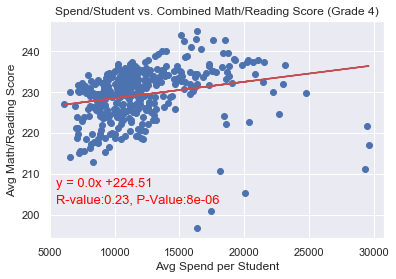

In [23]:
##################################
# 4th Grade Regression
##################################

# Set X and Y vals
reg_x_vals_4 = adj_grade_4_df["Average Spend per Student"]
reg_y_vals_4 = adj_grade_4_df["Average Math/Reading Score (4th Grade)"]

# Run Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(reg_x_vals_4, reg_y_vals_4)

# Get regression values
regress_values = reg_x_vals_4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
reg_values = "R-value:" + str(round(rvalue,2)) + ", " + "P-Value:" + str(round(pvalue,6))

# print(regress_values)

# To add regress line to your plot:
plt.scatter(reg_x_vals_4,reg_y_vals_4)
plt.title("Spend/Student vs. Combined Math/Reading Score (Grade 4)")
plt.xlabel("Avg Spend per Student")
plt.ylabel("Avg Math/Reading Score")
plt.plot(reg_x_vals_4,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(5500,207),fontsize=13,color="red")
plt.annotate(reg_values,(5500,203),fontsize=13,color="red")
plt.savefig("BP_Regression_Grade4.png")
plt.show()


In [21]:
############################################
# Run statistics to get upper and lower bounds
############################################

############################################
# Calculate IQR for Spend
############################################
quartiles_spend_8 = merged_state_df["Average Spend per Student"].quantile([.25, .5, .75])

lowerq_spend_8 = quartiles[0.25]
upperq_spend_8 = quartiles[0.75]
iqr_spend_8 = upperq_spend_8 - lowerq_spend_8

# Calculate upper and lower bounds
upper_bound_spend_8 = upperq_spend_8 + (1.5 * iqr) #
lower_bound_spend_8 = lowerq_spend_8 - (1.5 * iqr) #

############################################
# Calculate IQR for Score
############################################
quartiles_score_8 = merged_state_df["Average Math/Reading Score (8th Grade)"].quantile([.25, .5, .75])

lowerq_score_8 = quartiles[0.25]
upperq_score_8 = quartiles[0.75]
iqr_score_8 = upperq_score_8 - lowerq_score_8

# Calculate upper and lower bounds
upper_bound_score_8 = upperq_score_8 + (1.5 * iqr) #
lower_bound_score_8 = lowerq_score_8 - (1.5 * iqr) #


# Create Adjusted DF without outliers
adj_grade_8_df = merged_state_df.loc[(merged_state_df["Average Spend per Student"] < upper_bound_spend_8)
                                           & (merged_state_df["Average Spend per Student"] > lower_bound_spend_8)
                                            & (merged_state_df["Average Math/Reading Score (8th Grade)"] < upper_bound_score_8)
                                            &(merged_state_df["Average Math/Reading Score (8th Grade)"] > lower_bound_score_8)]




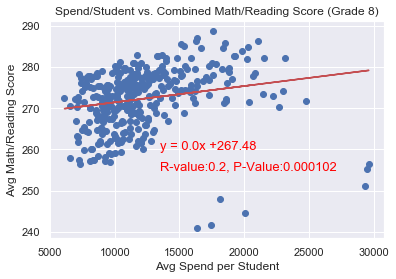

In [22]:
##################################
# 8th Grade Regression
##################################

# Set X and Y vals
reg_x_vals_8 = adj_grade_8_df["Average Spend per Student"]
reg_y_vals_8 = adj_grade_8_df["Average Math/Reading Score (8th Grade)"]

# Run Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(reg_x_vals_8, reg_y_vals_8)

# Get regression values
regress_values = reg_x_vals_8 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
reg_values = "R-value:" + str(round(rvalue,2)) + ", " + "P-Value:" + str(round(pvalue,6))

# print(regress_values)

# Add regress line to your plot:
plt.scatter(reg_x_vals_8,reg_y_vals_8)
plt.title("Spend/Student vs. Combined Math/Reading Score (Grade 8)")
plt.xlabel("Avg Spend per Student")
plt.ylabel("Avg Math/Reading Score")
plt.plot(reg_x_vals_8,regress_values,"r-")


# To add the equation to your plot:
plt.annotate(line_eq,(13500,260),fontsize=13,color="red")
plt.annotate(reg_values,(13500,255),fontsize=13,color="red")
plt.savefig("BP_Regression_Grade8.png")